In [1]:
import os
import glob
import netCDF4
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import gridspec
import cartopy.crs as ccrs
import cartopy.feature
import seaborn as sns

import wrf
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import matplotlib.ticker as mticker
import matplotlib.colors

import matplotlib as mpl

In [2]:
######################
# FUNCTIONS
######################

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [3]:
######################
# ALPS HIST

#Parameters
folder_mod = '/capstor/scratch/cscs/gsergi/OUTPUT_PGW_20220315/ANT_20220315_'
domain = 'd01'
acc_t = 1440 #minutes
ini_date_idx=0
tini_ix = 39
#end_date_idx=0

###load data###
snpack_files = '/SMB/SMB_'+domain+'_*'# Load netcdf

################
#hist
print('Charging Ant hist...')
wrflist_smb = []
proj = 'hist'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+snpack_files))))
for i,ncdf_smb in enumerate(np.sort(glob.glob(folder_mod+proj+snpack_files))):
        print(i, end="\r")
        wrflist_smb.append(netCDF4.Dataset(ncdf_smb))
    
# Get surface variables
smb_PREC_hist = wrf.getvar(wrflist_smb, 'M_BUDG_PREC', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
smb_EROD_hist = wrf.getvar(wrflist_smb, 'M_BUDG_EROD', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
smb_SUBL_hist = wrf.getvar(wrflist_smb, 'M_BUDG_SUBL', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
smb_DEPO_hist = wrf.getvar(wrflist_smb, 'M_BUDG_DEPOT', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
smb_REFR_hist = wrf.getvar(wrflist_smb, 'M_BUDG_REFREEZE', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
smb_MELT_hist = wrf.getvar(wrflist_smb, 'M_BUDG_MELT', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
smb_DSWE_hist = wrf.getvar(wrflist_smb, 'M_BUDG_DSWE', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]

################
#past
print('Charging Ant past...')
wrflist_smb = []
proj = 'past_new'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+snpack_files))))
for i,ncdf_smb in enumerate(np.sort(glob.glob(folder_mod+proj+snpack_files))):
        print(i, end="\r")
        wrflist_smb.append(netCDF4.Dataset(ncdf_smb))
    
# Get surface variables
smb_PREC_past = wrf.getvar(wrflist_smb, 'M_BUDG_PREC', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
smb_EROD_past = wrf.getvar(wrflist_smb, 'M_BUDG_EROD', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
smb_SUBL_past = wrf.getvar(wrflist_smb, 'M_BUDG_SUBL', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
smb_DEPO_past = wrf.getvar(wrflist_smb, 'M_BUDG_DEPOT', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
smb_REFR_past = wrf.getvar(wrflist_smb, 'M_BUDG_REFREEZE', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
smb_MELT_past = wrf.getvar(wrflist_smb, 'M_BUDG_MELT', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
smb_DSWE_past = wrf.getvar(wrflist_smb, 'M_BUDG_DSWE', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]


######################
# ANT COORDINATES
# Get surface fix variables
height = wrf.getvar(wrflist_smb, 'HGT', timeidx=0, method="cat")[:,:]
# Get dimension
lats, lons = wrf.latlon_coords(smb_PREC_hist)
times = wrf.extract_times(wrflist_smb, timeidx=wrf.ALL_TIMES)

Charging Ant hist...
Total: 59
Charging Ant past...
Total: 59


In [4]:
#Positions
CON_xy = wrf.ll_to_xy(wrflist_smb, -75.09978, 123.332196) #Concordia
CON_ll = wrf.xy_to_ll(wrflist_smb, CON_xy[0], CON_xy[1])
DDU_xy = wrf.ll_to_xy(wrflist_smb, -66.662778, 140.001111) #DDU
DDU_ll = wrf.xy_to_ll(wrflist_smb, DDU_xy[0], DDU_xy[1])
CIS_xy = wrf.ll_to_xy(wrflist_smb, -66.033333, 103.55) #DDU
CIS_ll = wrf.xy_to_ll(wrflist_smb, CIS_xy[0], CIS_xy[1])
#TS1_xy = wrf.ll_to_xy(wrflist_smb, -73, 140) #DDU
#TS1_ll = wrf.xy_to_ll(wrflist_smb, TST_xy[0], TST_xy[1])
#TS2_xy = wrf.ll_to_xy(wrflist_smb, -72, 140) #DDU
#TS2_ll = wrf.xy_to_ll(wrflist_smb, TST_xy[0], TST_xy[1])

/tmp/ipykernel_232423/3921470891.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax7.plot(wrf.to_np(CON_xy)[0], wrf.to_np(CON_xy)[1], 'ko', markersize=5, color='k')


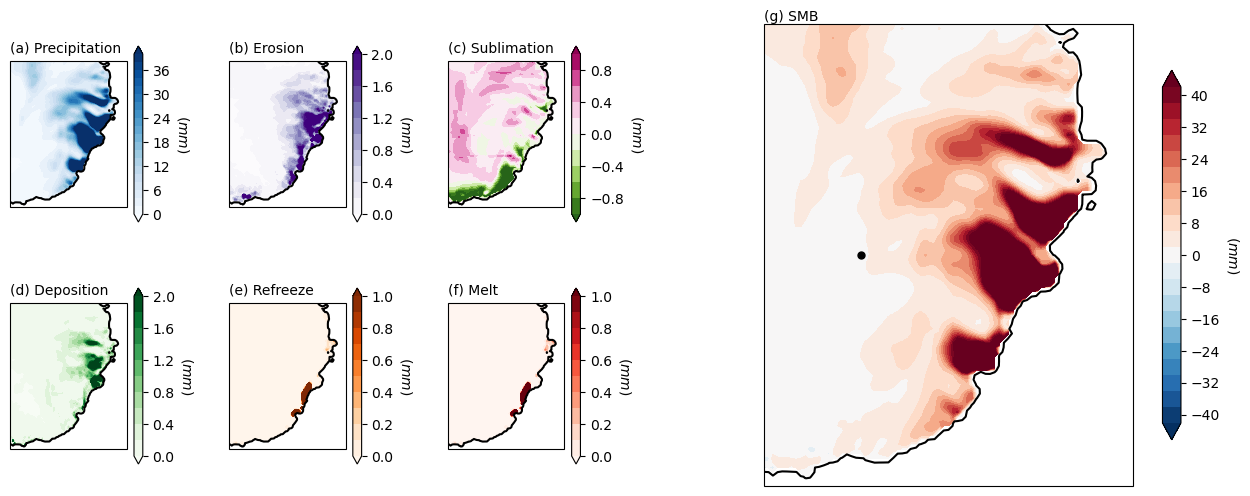

In [5]:
#############################################
# Plot terrein map
#############################################

min_height = 10

time_ix_ini = np.where(times == np.datetime64('2022-03-17T00'))[0][0]
time_ix_end = np.where(times == np.datetime64('2022-03-20T00'))[0][0]
  
#################
### Plot Norm ###
#Figure and axis
fig = plt.figure(figsize=[16,6])
spec = gridspec.GridSpec(ncols=6, nrows=2, figure=fig, hspace= 0.1, wspace=0.5)

### Background
ax1 = fig.add_subplot(spec[0, 0], projection=ccrs.SouthPolarStereo())
ax2 = fig.add_subplot(spec[0, 1], projection=ccrs.SouthPolarStereo())
ax3 = fig.add_subplot(spec[0, 2], projection=ccrs.SouthPolarStereo())
ax4 = fig.add_subplot(spec[1, 0], projection=ccrs.SouthPolarStereo())
ax5 = fig.add_subplot(spec[1, 1], projection=ccrs.SouthPolarStereo())
ax6 = fig.add_subplot(spec[1, 2], projection=ccrs.SouthPolarStereo())
ax7 = fig.add_subplot(spec[:, 3:], projection=ccrs.SouthPolarStereo())

CS1 = ax1.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
CS2 = ax2.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
CS3 = ax3.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
CS4 = ax4.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
CS5 = ax5.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
CS6 = ax6.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
CS7 = ax7.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")

ax7.plot(wrf.to_np(CON_xy)[0], wrf.to_np(CON_xy)[1], 'ko', markersize=5, color='k')

#Calculate difference between the beginning and the end of the event
smb_PREC_hist_event = wrf.to_np(smb_PREC_hist[time_ix_end,:,:].where(height > min_height)) - wrf.to_np(smb_PREC_hist[time_ix_ini,:,:].where(height > min_height))
smb_EROD_hist_event = wrf.to_np(smb_EROD_hist[time_ix_end,:,:].where(height > min_height)) - wrf.to_np(smb_EROD_hist[time_ix_ini,:,:].where(height > min_height))
smb_SUBL_hist_event = wrf.to_np(smb_SUBL_hist[time_ix_end,:,:].where(height > min_height)) - wrf.to_np(smb_SUBL_hist[time_ix_ini,:,:].where(height > min_height))
smb_DEPO_hist_event = wrf.to_np(smb_DEPO_hist[time_ix_end,:,:].where(height > min_height)) - wrf.to_np(smb_DEPO_hist[time_ix_ini,:,:].where(height > min_height))
smb_REFR_hist_event = wrf.to_np(smb_REFR_hist[time_ix_end,:,:].where(height > min_height)) - wrf.to_np(smb_REFR_hist[time_ix_ini,:,:].where(height > min_height))
smb_MELT_hist_event = wrf.to_np(smb_MELT_hist[time_ix_end,:,:].where(height > min_height)) - wrf.to_np(smb_MELT_hist[time_ix_ini,:,:].where(height > min_height))

fill1 = ax1.contourf(smb_PREC_hist_event, np.arange(0,41,2), cmap='Blues', extend="both")
fill2 = ax2.contourf(smb_EROD_hist_event, np.arange(0,2.1,.2), cmap='Purples', extend="both")
fill3 = ax3.contourf(smb_SUBL_hist_event, np.arange(-1,1.1,.2), cmap='PiYG_r', extend="both")
fill4 = ax4.contourf(smb_DEPO_hist_event, np.arange(0,2.1,.2), cmap='Greens', extend="both")
fill5 = ax5.contourf(smb_REFR_hist_event, np.arange(0,1.1,.1), cmap='Oranges', extend="both")
fill6 = ax6.contourf(smb_MELT_hist_event, np.arange(0,1.1,.1), cmap='Reds', extend="both")

ax1.set_title('(a) Precipitation', loc='left', fontsize=10)
ax2.set_title('(b) Erosion', loc='left', fontsize=10)
ax3.set_title('(c) Sublimation', loc='left', fontsize=10)
ax4.set_title('(d) Deposition', loc='left', fontsize=10)
ax5.set_title('(e) Refreeze', loc='left', fontsize=10)
ax6.set_title('(f) Melt', loc='left', fontsize=10)

cbar1 = plt.colorbar(fill1, shrink=0.8, ax=ax1); cbar1.set_label('($mm$)', rotation=270, labelpad=15)
cbar2 = plt.colorbar(fill2, shrink=0.8, ax=ax2); cbar2.set_label('($mm$)', rotation=270, labelpad=15)
cbar3 = plt.colorbar(fill3, shrink=0.8, ax=ax3); cbar3.set_label('($mm$)', rotation=270, labelpad=15)
cbar4 = plt.colorbar(fill4, shrink=0.8, ax=ax4); cbar4.set_label('($mm$)', rotation=270, labelpad=15)
cbar5 = plt.colorbar(fill5, shrink=0.8, ax=ax5); cbar5.set_label('($mm$)', rotation=270, labelpad=15)
cbar6 = plt.colorbar(fill6, shrink=0.8, ax=ax6); cbar6.set_label('($mm$)', rotation=270, labelpad=15)


smb_hist = smb_PREC_hist - smb_EROD_hist - smb_SUBL_hist + smb_DEPO_hist + smb_REFR_hist - smb_MELT_hist
fill7 = ax7.contourf(wrf.to_np(smb_hist[time_ix_end,:,:].where(height > min_height)) - wrf.to_np(smb_hist[time_ix_ini,:,:].where(height > min_height)), np.arange(-42,42.1,4), cmap='RdBu_r', extend="both")
cbar7 = plt.colorbar(fill7, shrink=0.8, ax=ax7)
cbar7.set_label('($mm$)', rotation=270, labelpad=15)
cbar7.set_ticks(np.arange(-40,40.1,8))
ax7.set_title('(g) SMB', pad=-2000, loc='left', fontsize=10)

for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7]:
    ax.set_extent([140, 220, 30, 130], crs=ccrs.SouthPolarStereo())

/tmp/ipykernel_232423/2774599720.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax7.plot(wrf.to_np(CON_xy)[0], wrf.to_np(CON_xy)[1], 'ko', markersize=5, color='k')
/tmp/ipykernel_232423/2774599720.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax7.plot(wrf.to_np(DDU_xy)[0], wrf.to_np(DDU_xy)[1], 'ko', markersize=5, color='k')
/tmp/ipykernel_232423/2774599720.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax7.plot(wrf.to_np(CIS_xy)[0], wrf.to_np(CIS_xy)[1], 'ko', markersize=5, color='k')


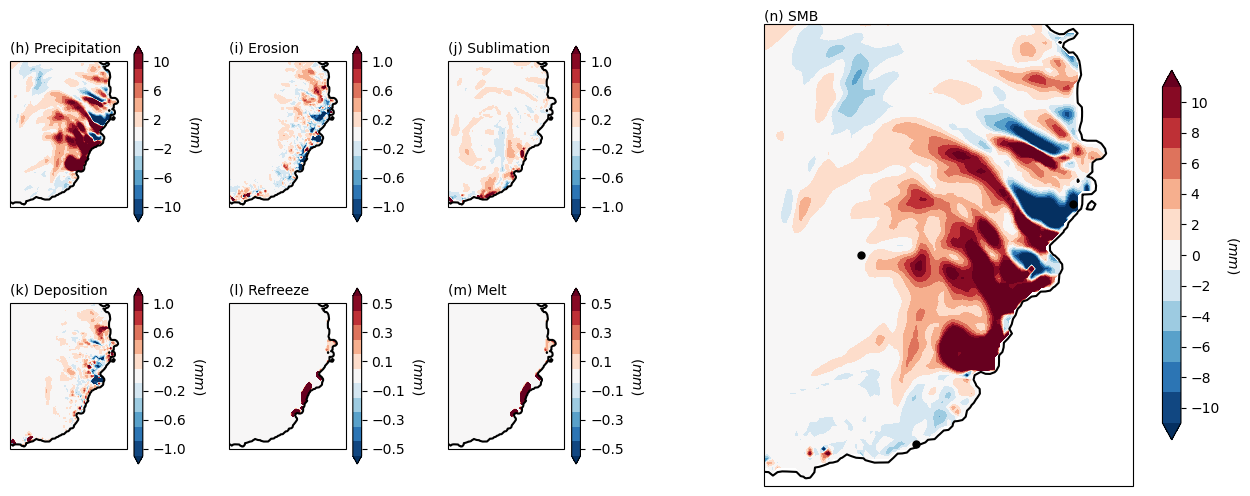

In [6]:
#############################################
# Plot terrein map
#############################################

min_height = 10
time_ix_ini = 79
time_ix_end = 119
  
#################
### Plot Norm ###
#Figure and axis
fig = plt.figure(figsize=[16,6])
spec = gridspec.GridSpec(ncols=6, nrows=2, figure=fig, hspace= 0.1, wspace=0.5)

### Background
ax1 = fig.add_subplot(spec[0, 0], projection=ccrs.SouthPolarStereo())
ax2 = fig.add_subplot(spec[0, 1], projection=ccrs.SouthPolarStereo())
ax3 = fig.add_subplot(spec[0, 2], projection=ccrs.SouthPolarStereo())
ax4 = fig.add_subplot(spec[1, 0], projection=ccrs.SouthPolarStereo())
ax5 = fig.add_subplot(spec[1, 1], projection=ccrs.SouthPolarStereo())
ax6 = fig.add_subplot(spec[1, 2], projection=ccrs.SouthPolarStereo())
ax7 = fig.add_subplot(spec[:, 3:], projection=ccrs.SouthPolarStereo())

CS1 = ax1.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
CS2 = ax2.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
CS3 = ax3.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
CS4 = ax4.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
CS5 = ax5.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
CS6 = ax6.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
CS7 = ax7.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")

ax7.plot(wrf.to_np(CON_xy)[0], wrf.to_np(CON_xy)[1], 'ko', markersize=5, color='k')
ax7.plot(wrf.to_np(DDU_xy)[0], wrf.to_np(DDU_xy)[1], 'ko', markersize=5, color='k')
ax7.plot(wrf.to_np(CIS_xy)[0], wrf.to_np(CIS_xy)[1], 'ko', markersize=5, color='k')

#Calculate difference between the beginning and the end of the event
smb_PREC_hist_event = wrf.to_np(smb_PREC_hist[time_ix_end,:,:].where(height > min_height)) - wrf.to_np(smb_PREC_hist[time_ix_ini,:,:].where(height > min_height))
smb_EROD_hist_event = wrf.to_np(smb_EROD_hist[time_ix_end,:,:].where(height > min_height)) - wrf.to_np(smb_EROD_hist[time_ix_ini,:,:].where(height > min_height))
smb_SUBL_hist_event = wrf.to_np(smb_SUBL_hist[time_ix_end,:,:].where(height > min_height)) - wrf.to_np(smb_SUBL_hist[time_ix_ini,:,:].where(height > min_height))
smb_DEPO_hist_event = wrf.to_np(smb_DEPO_hist[time_ix_end,:,:].where(height > min_height)) - wrf.to_np(smb_DEPO_hist[time_ix_ini,:,:].where(height > min_height))
smb_REFR_hist_event = wrf.to_np(smb_REFR_hist[time_ix_end,:,:].where(height > min_height)) - wrf.to_np(smb_REFR_hist[time_ix_ini,:,:].where(height > min_height))
smb_MELT_hist_event = wrf.to_np(smb_MELT_hist[time_ix_end,:,:].where(height > min_height)) - wrf.to_np(smb_MELT_hist[time_ix_ini,:,:].where(height > min_height))

smb_PREC_past_event = wrf.to_np(smb_PREC_past[time_ix_end,:,:].where(height > min_height)) - wrf.to_np(smb_PREC_past[time_ix_ini,:,:].where(height > min_height))
smb_EROD_past_event = wrf.to_np(smb_EROD_past[time_ix_end,:,:].where(height > min_height)) - wrf.to_np(smb_EROD_past[time_ix_ini,:,:].where(height > min_height))
smb_SUBL_past_event = wrf.to_np(smb_SUBL_past[time_ix_end,:,:].where(height > min_height)) - wrf.to_np(smb_SUBL_past[time_ix_ini,:,:].where(height > min_height))
smb_DEPO_past_event = wrf.to_np(smb_DEPO_past[time_ix_end,:,:].where(height > min_height)) - wrf.to_np(smb_DEPO_past[time_ix_ini,:,:].where(height > min_height))
smb_REFR_past_event = wrf.to_np(smb_REFR_past[time_ix_end,:,:].where(height > min_height)) - wrf.to_np(smb_REFR_past[time_ix_ini,:,:].where(height > min_height))
smb_MELT_past_event = wrf.to_np(smb_MELT_past[time_ix_end,:,:].where(height > min_height)) - wrf.to_np(smb_MELT_past[time_ix_ini,:,:].where(height > min_height))

#Plot data
fill1 = ax1.contourf(smb_PREC_hist_event - smb_PREC_past_event, np.arange(-11,11.1,2), cmap='RdBu_r', extend="both")
fill2 = ax2.contourf(smb_EROD_hist_event - smb_EROD_past_event, np.arange(-1.1,1.2,.2), cmap='RdBu_r', extend="both")
fill3 = ax3.contourf(smb_SUBL_hist_event - smb_SUBL_past_event, np.arange(-1.1,1.2,.2), cmap='RdBu_r', extend="both")
fill4 = ax4.contourf(smb_DEPO_hist_event - smb_DEPO_past_event, np.arange(-1.1,1.2,.2), cmap='RdBu_r', extend="both")
fill5 = ax5.contourf(smb_REFR_hist_event - smb_REFR_past_event, np.arange(-0.55,0.56,.1), cmap='RdBu_r', extend="both")
fill6 = ax6.contourf(smb_MELT_hist_event - smb_MELT_past_event, np.arange(-0.55,0.56,.1), cmap='RdBu_r', extend="both")

ax1.set_title('(h) Precipitation', loc='left', fontsize=10)
ax2.set_title('(i) Erosion', loc='left', fontsize=10)
ax3.set_title('(j) Sublimation', loc='left', fontsize=10)
ax4.set_title('(k) Deposition', loc='left', fontsize=10)
ax5.set_title('(l) Refreeze', loc='left', fontsize=10)
ax6.set_title('(m) Melt', loc='left', fontsize=10)

cbar1 = plt.colorbar(fill1, shrink=0.8, ax=ax1); cbar1.set_ticks(np.arange(-10,10.1,4)); cbar1.set_label('($mm$)', rotation=270, labelpad=15)
cbar2 = plt.colorbar(fill2, shrink=0.8, ax=ax2); cbar2.set_ticks(np.arange(-1,1.1,0.4)); cbar2.set_label('($mm$)', rotation=270, labelpad=15)
cbar3 = plt.colorbar(fill3, shrink=0.8, ax=ax3); cbar3.set_ticks(np.arange(-1,1.1,0.4)); cbar3.set_label('($mm$)', rotation=270, labelpad=15)
cbar4 = plt.colorbar(fill4, shrink=0.8, ax=ax4); cbar4.set_ticks(np.arange(-1,1.1,0.4)); cbar4.set_label('($mm$)', rotation=270, labelpad=15)
cbar5 = plt.colorbar(fill5, shrink=0.8, ax=ax5); cbar5.set_ticks(np.arange(-0.5,0.6,0.2)); cbar5.set_label('($mm$)', rotation=270, labelpad=15)
cbar6 = plt.colorbar(fill6, shrink=0.8, ax=ax6); cbar6.set_ticks(np.arange(-0.5,0.6,0.2)); cbar6.set_label('($mm$)', rotation=270, labelpad=15)


smb_hist_event = smb_PREC_hist_event - smb_EROD_hist_event - smb_SUBL_hist_event + smb_DEPO_hist_event + smb_REFR_hist_event - smb_MELT_hist_event
smb_past_event = smb_PREC_past_event - smb_EROD_past_event - smb_SUBL_past_event + smb_DEPO_past_event + smb_REFR_past_event - smb_MELT_past_event

fill7 = ax7.contourf(smb_hist_event - smb_past_event, np.arange(-11,11.1,2), cmap='RdBu_r', extend="both")
cbar7 = plt.colorbar(fill7, shrink=0.8, ax=ax7)
cbar7.set_ticks(np.arange(-10,10.1,2))
cbar7.set_label('($mm$)', rotation=270, labelpad=15)
ax7.set_title('(n) SMB', pad=-2000, loc='left', fontsize=10)

for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7]:
    ax.set_extent([140, 220, 30, 130], crs=ccrs.SouthPolarStereo())